In [1]:
import numpy as np
import tensorflow as tf

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = np.linspace(0,100,100)
x_data

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [3]:
y_label = 3 * x_data + 2 + np.random.normal(-35,35,100)
#y_label = 3 * x_data + 2
y_label

array([-54.9364161 , -19.06282709, -28.83026247, -90.375544  ,
       -31.93687734, -15.90145244,  34.25885113,  27.08934731,
        -0.75620947, -52.86296738, -51.71026132,  34.314245  ,
       -44.31063905,  51.24863322,  54.83468902,  32.85719232,
        32.47080407,  32.0218982 ,   4.00592043,  40.10026284,
        82.72704443,   1.08330436,  16.56916714, -40.00047009,
         8.2845772 ,  71.57915445,  11.8289006 ,  56.51908034,
        86.02614904,  14.72881813,  78.88154721,  21.99239835,
        48.21935656,   3.08835201,  16.79704325,  52.91176474,
        61.27751084,  75.9852307 ,  65.32966964,  71.99921788,
        75.72611892, 130.64565345, 161.82267917,  52.53297505,
       105.3287052 ,  48.81845864, 140.07316355, 118.03538162,
       136.83826554, 108.88413623, 121.30355762, 102.91059238,
       173.43275439, 129.12209968, 106.68228466, 171.88989273,
       109.59879847, 149.06615158, 156.8830555 , 122.81456729,
       131.31823033, 180.43027009, 170.43606367, 137.97

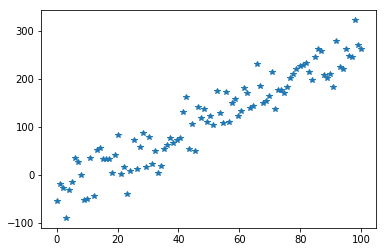

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_data,y_label,'*')
plt.show()

In [5]:
m = tf.Variable(.5)
b= tf.Variable(2.0)

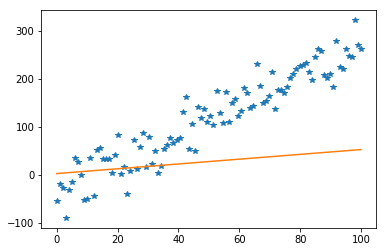

In [6]:
plt.plot(x_data,y_label,'*')
plt.plot(x_data, .5 *x_data +2.0)
plt.show()

In [7]:
error =0
for x,y in zip(x_data,y_label):
    y_hat = m*x+b
    error += (y-y_hat)**2
error = 1 / len(x_data) * error

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)
train = optimizer.minimize(error)

In [9]:
init = tf.global_variables_initializer()

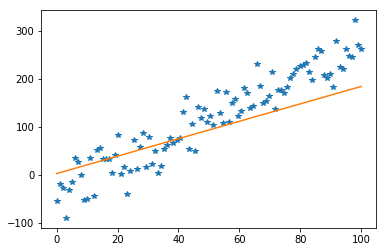

2768.8516


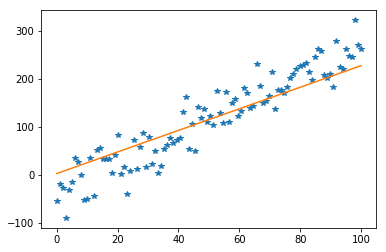

1519.8037


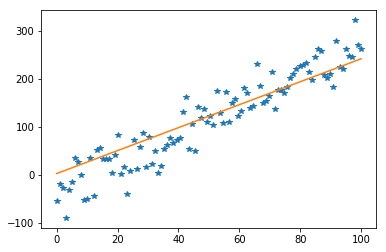

1383.8969


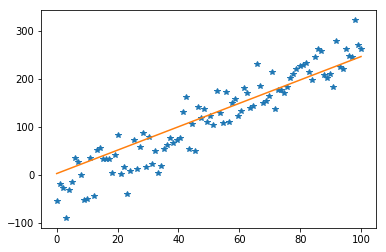

1369.0769


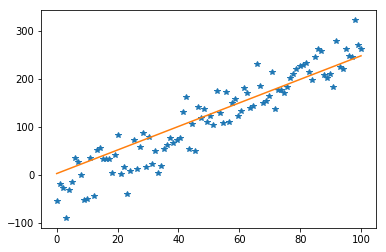

1367.4285


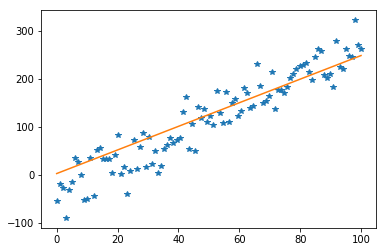

1367.2128


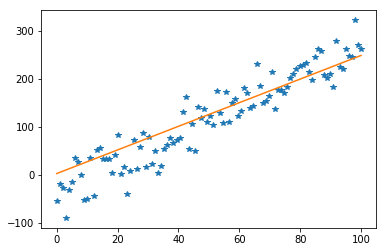

1367.1528


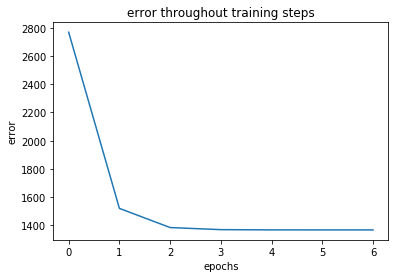

final slope is: 2.4599673748016357 
final intercept is: 2.015120029449463


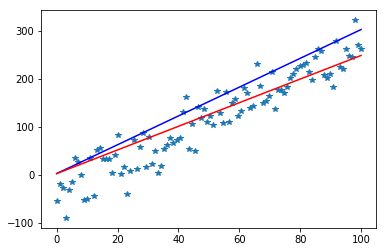

In [10]:
with tf.Session() as sess:
    error_list=[]
    sess.run(init)
    training_steps = 7
    for i in range(training_steps):
        sess.run(train)
        plt.plot(x_data,y_label,'*')
        plt.plot(x_data, sess.run(m) *x_data + sess.run(b))
        plt.show()
        print(error.eval())
        error_list.append(error.eval())
    final_slope,final_intercept = sess.run([m,b])
    plt.plot(error_list)
    plt.title("error throughout training steps")
    plt.xlabel("epochs")
    plt.ylabel("error")
    plt.show()
    print("final slope is: {} \nfinal intercept is: {}".format(final_slope,final_intercept))
    plt.plot(x_data,y_label,'*')
    plt.plot(x_data,3 * x_data + 2,'b')
    plt.plot(x_data,final_slope * x_data + final_intercept,'r')
    plt.show()